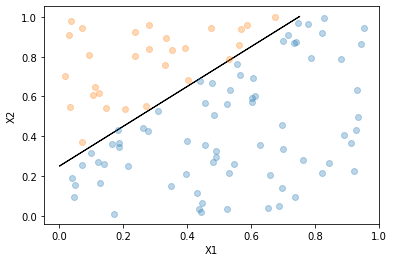

In [81]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()

# Funções de Custo

In [82]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


# Perceptron

In [83]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.014
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

328.29794462087557
100.06654976267852
355.6209300686068
73.6359697701561
409.845448171998
58.408769659232135
498.07083857739207
59.12712724909093
633.5751601268666
86.4775017190209
838.6486430283834
160.4292601278402
1149.4679215781139
316.0129450905063
1624.1857963871712
613.0247979376562
2356.1900897202254
1152.1248294613417
3495.7451408525535
2101.3913647303953
[4.65490487 3.40611303 0.75231631]
0.72


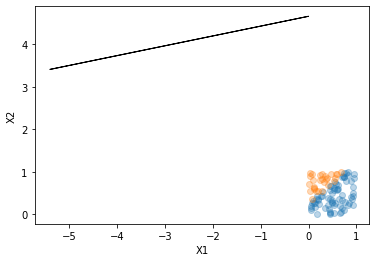

In [84]:
plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])

In [85]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[ 6.67367827e-01, -8.56820858e-02,  5.98049691e-01],
        [-3.67467113e-02, -2.59535248e-01, -4.25140758e-02],
        [ 8.29808036e-01,  3.18217136e-01,  2.25726688e-01],
        [-8.81160037e-02,  8.62234141e-03, -4.86958578e-01],
        [ 1.00490095e+00,  6.68933814e-01, -4.81803463e-02],
        [-1.82773689e-01,  2.01997454e-01, -8.73884905e-01],
        [ 1.20321287e+00,  9.82579234e-01, -2.35624609e-01],
        [-3.26541754e-01,  3.27620082e-01, -1.22262151e+00],
        [ 1.43678737e+00,  1.27395585e+00, -3.44232766e-01],
        [-5.28178825e-01,  3.89252563e-01, -1.55101177e+00],
        [ 1.71985917e+00,  1.55728547e+00, -3.77584349e-01],
        [-7.99930241e-01,  3.87462349e-01, -1.87633452e+00],
        [ 2.06970616e+00,  1.84693394e+00, -3.35281068e-01],
        [-1.15828613e+00,  3.19528993e-01, -2.21622278e+00],
        [ 2.50769053e+00,  2.15817046e+00, -2.12803136e-01],
        [-1.62499464e+00,  1.79174360e-01, -2.58963027e+00],
        [ 3.06055141e+00

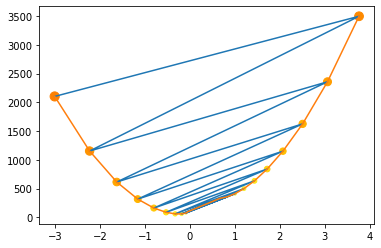

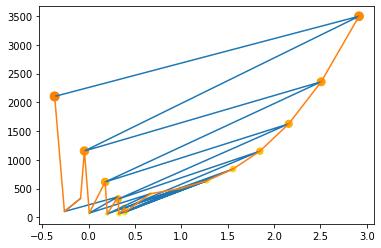

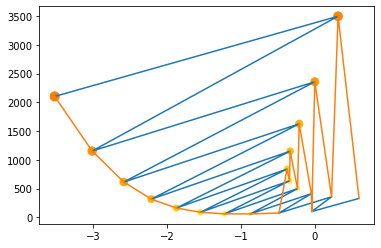

In [86]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='Wistia')
    idx = np.argsort(whist[:,i])
    plt.plot(whist[idx,i], chist[idx])
    plt.show()

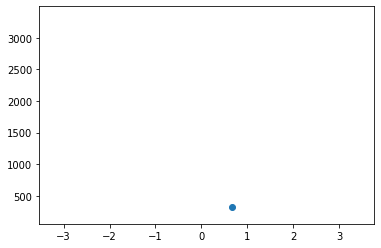

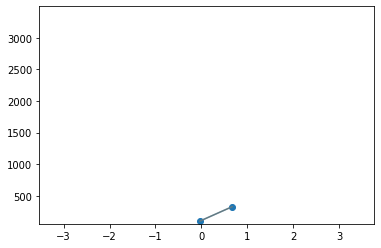

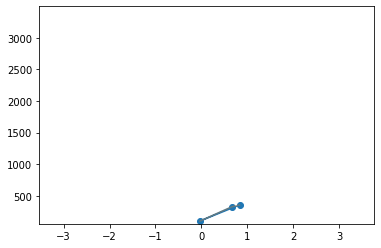

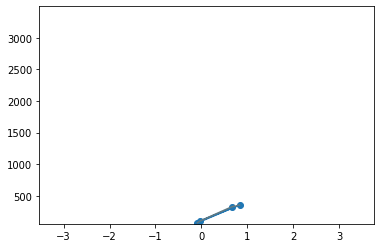

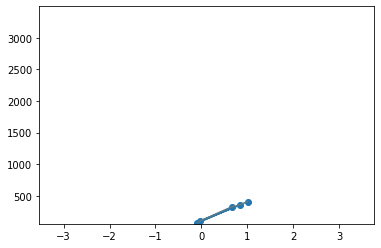

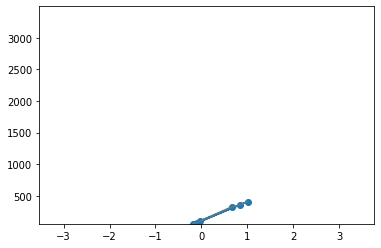

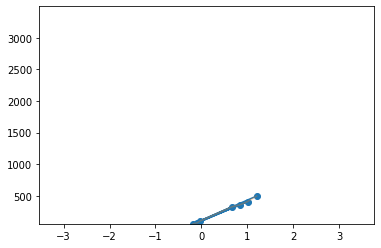

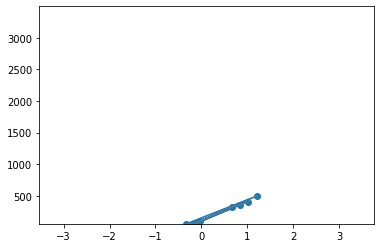

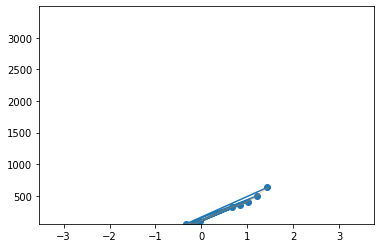

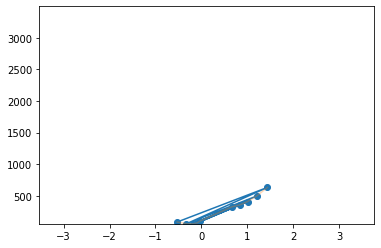

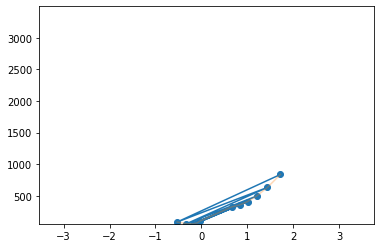

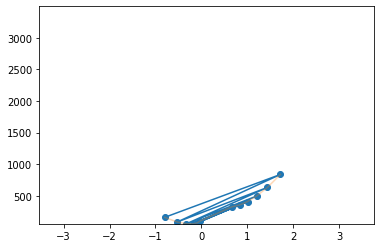

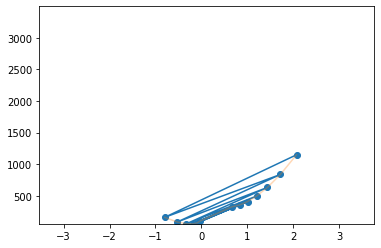

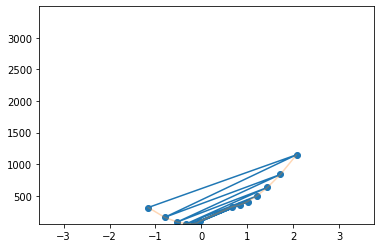

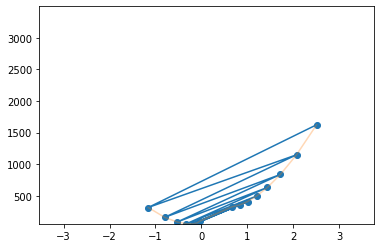

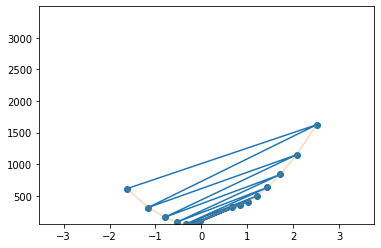

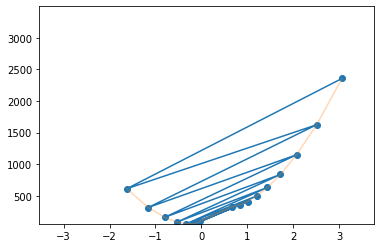

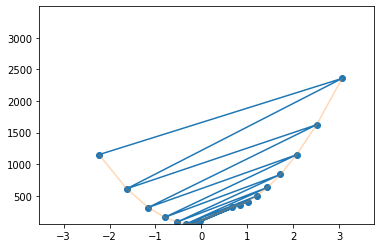

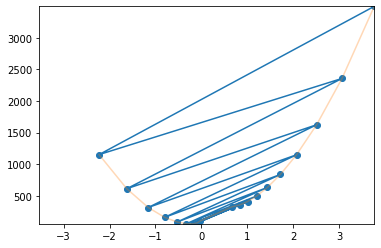

In [87]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.xlim([np.min(whist), np.max(whist)])
        plt.ylim([np.min(chist), np.max(chist)])
        plt.show()